# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Bricolages

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [31]:
import importlib
import pandas as pd
import seaborn as sns

### Chargement des données

In [32]:
article_filename = ''

In [35]:
%%time
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb(article_filename)
article_db.df()

CPU times: user 3.84 s, sys: 682 ms, total: 4.52 s
Wall time: 4.57 s


,url,title,article,site,author,date_iso,url_h,c_count,date_short
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,reseauinternational.net,NaN,2022-09-30T00:00:00,f95a294c94ff76cc9626ae06300a8b38067f89cf,10410,2022-09-30
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",reseauinternational.net,NaN,2022-09-30T00:00:00,c924dab7ded47578d81c3ae46f8be0964b3c50f1,1705,2022-09-30
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,lemediaen442.fr,NaN,2022-09-29T00:00:00,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,1588,2022-09-29
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-28T13:15:00,0c0341a1f5fae820ee307cb54024df6b06a93d85,4118,2022-09-28
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",www.breizh-info.com,NaN,2022-09-27T00:00:00,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,1181,2022-09-27
...,...,...,...,...,...,...,...,...,...
77739,https://www.lelibrepenseur.org/une-histoire-vi...,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,www.lelibrepenseur.org,Par\nAdmin,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,7889,2010-05-04
77740,https://www.lelibrepenseur.org/actus/,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",www.lelibrepenseur.org,Par\nuser,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,2179,2007-07-07
77741,https://www.lelibrepenseur.org/affiche-des-dec...,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,www.lelibrepenseur.org,NaN,NaN,a175027896cf79e76dfad6409694fafacf1919b3,2250,NaN
77742,https://www.lelibrepenseur.org/communaute/,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,www.lelibrepenseur.org,NaN,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,2937,NaN


## Expérience
---

### date_short

In [36]:
df_corpus = article_db.df().copy()

In [37]:
df_corpus[df_corpus['date_iso'].notna()].shape

(55480, 9)

In [38]:
def short_date(d_iso):
    if type(d_iso)==str:
        if len(d_iso)>9:
            return d_iso[:10]

In [39]:
df_corpus['date_short']=df_corpus['date_iso'].apply(short_date)

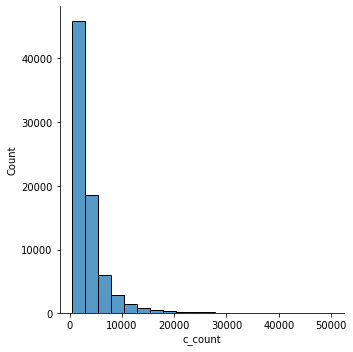

In [43]:
sns.displot(df_corpus,x='c_count',bins=20)

### c_count

In [41]:
df_corpus[df_corpus['c_count']>30000]

,url,title,article,site,author,date_iso,url_h,c_count,date_short
143,https://reseauinternational.net/lempire-de-cha...,L’empire de Charles : L’énigme de la Réinitial...,1. Charles le Grand Réinitialisateur\nLorsque ...,reseauinternational.net,NaN,2022-09-26T00:00:00,91023d82263ef829042ed469bbab34434489f7ef,35220,2022-09-26
178,https://www.wikistrike.com/2022/09/oxyde-de-gr...,"Oxyde de graphène dans les vaccins, anomalies ...",ENTRETIEN — Que savons-nous des troubles de la...,www.wikistrike.com,NaN,2022-09-26T00:00:00,f3ba5d15c839fe88b60d0b0b571f95aa947e0d1c,31474,2022-09-26
192,https://www.francesoir.fr/opinions-entretien/j...,"Oxyde de graphène dans les vaccins, anomalies ...",ENTRETIEN — Que savons-nous des troubles de la...,www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-25T19:55:00,ff1194a3d4d0842790adee972321015bc230d9a5,31336,2022-09-25
313,https://www.lesalonbeige.fr/la-messe-tradition...,La messe traditionnelle a un très bel avenir,Environ 600 personnes ont participé samedi au ...,www.lesalonbeige.fr,Par Michel Janva,2022-09-25T00:00:00,518ad6581d2a27274b11b15bb2c8e23625c7ae77,34103,2022-09-25
369,https://www.francesoir.fr/opinions-tribunes/po...,Pourquoi la lutte contre le mésusage des médic...,TRIBUNE - Mon plan pour lutter efficacement co...,www.francesoir.fr,"Auteur(s)\nFrançois Pesty, pour FranceSoir",2022-09-24T16:10:00,735cf44e25d5a0e9fcad4735001e235ac3871294,35632,2022-09-24
...,...,...,...,...,...,...,...,...,...
75264,https://www.lelibrepenseur.org/vaccination-cov...,Vaccination Covid en Nouvelle-Zélande : les mé...,Voici un papier que vous ne trouverez nulle pa...,www.lelibrepenseur.org,Par\nAguellid,2022-06-13T00:00:00,0488482da23878353f4f18b9b9202436db0cf8a4,30091,2022-06-13
75480,https://www.lelibrepenseur.org/preuve-factuell...,Preuve factuelle que l’ARNm des vaccins peut s...,Il ne suffit pas de traiter ses adversaires de...,www.lelibrepenseur.org,Par\nAguellid,2022-02-28T00:00:00,71836bbd8fec9d0afe1c501c55b87073a783ac1f,43215,2022-02-28
75627,https://www.lelibrepenseur.org/actualites-en-r...,Actualités en République bananière de mougeonn...,"La bêtise humaine est inépuisable, gratuite et...",www.lelibrepenseur.org,Par\nLe Bouc Émissaire,2022-01-26T00:00:00,7b865d18784fb7971e75a36eb44c5e81cd9fbc90,31044,2022-01-26
76067,https://www.lelibrepenseur.org/rappel-aziz-zem...,"Rappel : Aziz Zemouri, le journaliste comploti...","Faisant preuve d’un amateurisme étonnant, Mons...",www.lelibrepenseur.org,Par\nAdmin,2021-11-08T00:00:00,26701b6b5bfccb20cfbcbbff65b33e0f81a574e5,33687,2021-11-08


## Mesure et observation des résultats
---

In [42]:
df_corpus.shape

(77744, 9)

## Sauvegarde des résultats
---

In [29]:
df = article_db.df().drop(columns='Unnamed: 0')

In [30]:
df.to_csv(article_db._prod_filename,index=False)

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [10]:
! pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [6]:
ls

data/      notebooks/ patat/     venv/


In [7]:
ls patat/

README.md         doc/              ml/               util/
app/              etc/              notebooks/
db/               imp/              requirements.txt


In [9]:
!pip install -r patat/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 2.8 MB/s eta 0:00:0000:0100:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached asttokens-2.0.5-py2.py3-none-any.whl (20 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.3 MB/s eta 0:00:0000:0100:01
  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 2.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.6 MB/s eta 0:00:0000:010

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 910.6 kB/s eta 0:00:00 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=71b132ce04f2099f38399ed3ed8b1c6177cbcf96a21d92e2c961fb0dd8c7d0f0
  Stored in directory: /Users/fm/Library/Caches/pip/wheels/8b/ac/c5/cb646ab01df6f353a9994b1c97dffb94f9b12013d64c162c58
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13481 sha256=61ac296d921864add67b6a2bad927e9f1707b217c7c6230295e448ba5a85a326
  Stored in directory: /Users/fm/Library/Caches/pip/wheels/56/d0/3c/0cce3dfb2d07c8764a9e5da3a2b80e5430cef0de3f1ecb6f3b
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24571 sha256=3b7c8b15682665fecd034f6b4c1cd24f1259b43aa86be07473758fc132ea2ed4
  Stored in directory: /Users/fm/Library/Caches/pip/wheels/13/37/a2/e4bbb20a9e1bcb7643e432f71f513ea1fc1fb7f8a1cc718a2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=d54ba0d

  Attempting uninstall: notebook
    Found existing installation: notebook 6.5.1
    Uninstalling notebook-6.5.1:
      Successfully uninstalled notebook-6.5.1
